In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree classifier
from sklearn.metrics import accuracy_score,precision_score, f1_score, confusion_matrix, recall_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [14]:
# Load the dataset
heart_data = pd.read_csv('heart.csv')

In [15]:
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [17]:
heart_data.shape

(1025, 14)

In [18]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
heart_data.notnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1021,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1022,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1023,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [20]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
heart_data.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [23]:
# Define features and target

x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [24]:
x.shape

(1025, 13)

In [25]:
y.shape

(1025,)

In [26]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [27]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [28]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


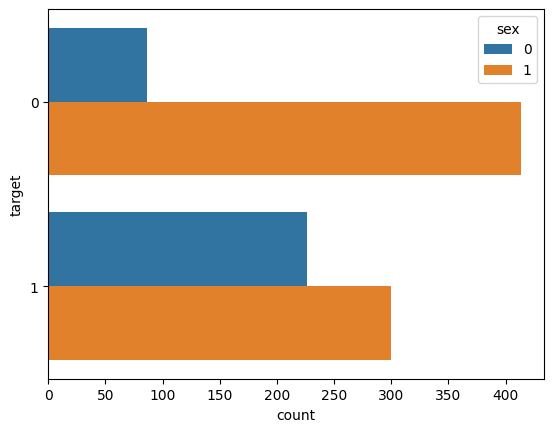

In [29]:
sns.countplot (y= 'target' , hue= 'sex' , data = heart_data)
plt.show()

In [30]:
heart_data.shape

(1025, 14)

In [31]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)


In [33]:
# Apply Standardization
scaler = StandardScaler()

# Fit only on training data and transform both train and test
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [34]:
x_train.shape , x_test.shape 

((820, 13), (205, 13))

In [35]:
y_train.shape , y_test.shape 

((820,), (205,))

MACHINE LEARNING MODEL

APPLYING LOGISTIC REGRESSION MODEL 

In [36]:
# Logistic Regression Model
log_model = LogisticRegression()


In [37]:
#training the model with the help of training data
#fit the model according to given training data
log_model.fit(x_train , y_train)         

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


MODEL EVALUATION

ACCURACY SCORE

In [38]:
# Predictions and accuracy for Logistic Regression
x_train_prediction = log_model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on training data (Logistic Regression):', training_data_accuracy)

Accuracy on training data (Logistic Regression): 0.8585365853658536


In [39]:
# Predictions and accuracy for Logistic Regression
x_test_prediction = log_model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on testing data (Logistic Regression):', testing_data_accuracy)

Accuracy on testing data (Logistic Regression): 0.8048780487804879


MACHINE LEARNING MODEL

DECISION TREE CLASSIFIER MODEL

In [40]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
# Predictions and accuracy for Decision Tree
x_train_prediction_dt = dt_model.predict(x_train)
training_data_accuracy_dt = accuracy_score(x_train_prediction_dt, y_train)
print('Accuracy on training data (Decision Tree):', training_data_accuracy_dt)

Accuracy on training data (Decision Tree): 1.0


In [42]:
x_test_prediction_dt = dt_model.predict(x_test)
testing_data_accuracy_dt = accuracy_score(x_test_prediction_dt, y_test)
print('Accuracy on test data (Decision Tree):', testing_data_accuracy_dt)

Accuracy on test data (Decision Tree): 1.0


In [43]:
# Making a prediction for new input data
#input_data = (	56,	1,	2,	130,	256,	1,	0,	142,	1,	0.6,	1,	1,	1)
input_data = (	52,	1,	1,	128,	205,	1,	1,	184,	0,	0,	2,	0,	2)
input_data_numpy_array = np.asarray(input_data)
input_reshape = input_data_numpy_array.reshape(1, -1)


In [44]:
# Apply same scaler to new input
input_reshape = scaler.transform(input_reshape)


c:\Users\KINSHU KESHRI\Desktop\streamlit\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
# Logistic Regression Prediction
log_prediction = log_model.predict(input_reshape)
print(log_prediction)
if log_prediction[0] == 0:
    print('Logistic Regression: The person does not have a heart disease')
else:
    print('Logistic Regression: The person has a heart disease')

[1]
Logistic Regression: The person has a heart disease


In [46]:
# Decision Tree Prediction
dt_prediction = dt_model.predict(input_reshape)
print(dt_prediction)

if dt_prediction[0] == 0:
    print('Decision Tree: The person does not have a heart disease')
else:
    print('Decision Tree: The person has a heart disease')

[1]
Decision Tree: The person has a heart disease


In [47]:
# Confusion Matrix for logistic regression Tree
log_conf_matrix = confusion_matrix(y_test, x_test_prediction)
print(log_conf_matrix)

[[73 27]
 [13 92]]


In [48]:
# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, x_test_prediction_dt)
print(dt_conf_matrix)

[[100   0]
 [  0 105]]


In [49]:
# Precision, Recall, and F1 score for the train data of LOGISTIC REGRESSION MODEL
precision = precision_score(y_train, x_train_prediction)
f1 = f1_score(y_train, x_train_prediction)
recall = recall_score(y_train, x_train_prediction)

print('Precision on train data:', precision)
print('F1 score on train data:', f1)
print('Recall score on train data: ' , recall)


Precision on train data: 0.8381374722838137
F1 score on train data: 0.8669724770642202
Recall score on train data:  0.8978622327790974


In [50]:
# Precision, Recall, and F1 score for the train data of DECISSION TREE CLASSIFIER
precision = precision_score(y_train, x_train_prediction_dt)
f1 = f1_score(y_train, x_train_prediction_dt)
recall = recall_score(y_train, x_train_prediction_dt)

print('Precision on train data of decision tree:', precision)
print('F1 score on train data of decision tree:', f1)
print('Recall score on train data of decision tree: ' , recall)



Precision on train data of decision tree: 1.0
F1 score on train data of decision tree: 1.0
Recall score on train data of decision tree:  1.0


In [51]:
# Precision, Recall, and F1 score for the test data of LOGISTIC REGRESSION MODEL
precision = precision_score(y_test, x_test_prediction)
f1 = f1_score(y_test, x_test_prediction)
recall = recall_score(y_test, x_test_prediction)

print('Precision on test data of logistic regression model:', precision)
print('F1 score on test data of logistic regression model:', f1)
print('Recall score on tst data of logistic regression model: ' , recall)


Precision on test data of logistic regression model: 0.773109243697479
F1 score on test data of logistic regression model: 0.8214285714285714
Recall score on tst data of logistic regression model:  0.8761904761904762


In [52]:
# Precision, Recall, and F1 score for the test data of DECISSION TREE CLASSIFIER
precision = precision_score(y_test, x_test_prediction_dt)
f1 = f1_score(y_test, x_test_prediction_dt)
recall = recall_score(y_test, x_test_prediction_dt)
print('Precision on test data:', precision)
print('F1 score on test data:', f1)
print('Recall score on tst data of decission tree model: ' , recall)


Precision on test data: 1.0
F1 score on test data: 1.0
Recall score on tst data of decission tree model:  1.0


In [55]:
with open('model.pkl', 'wb') as f:
    pickle.dump(log_model, f)